In [1]:
import helper as hp
import pandas as pd
import time
import numpy as np

In [2]:
from tqdm import tqdm
def get_closing_prices(df:pd.DataFrame,symbols:list,start_jiffy,end_jiffy,frequency):
    #This is teh trade book
    frequency_in_jiffies=frequency*60*65535
    closing_prices={}
    for symbol in symbols:
        closing_prices[symbol]=[]
    for symbol in symbols:
        for jiffy in tqdm(range(start_jiffy, end_jiffy, frequency_in_jiffies)):
            filtered_df = df[(df['trade_time'].astype(int) >= jiffy) & (df['trade_time'].astype(int) <= jiffy+frequency_in_jiffies)]
            closing_price = filtered_df[filtered_df['symbol'].str.lstrip('b') == symbol]['trade_price'].iloc[-1].astype(int)
            closing_prices[symbol].append(closing_price/100.0)
    return closing_prices

In [3]:
date='03'
df=pd.read_csv(f'CASH_Orders_{date}122012.csv')
file_path = 'symbols.txt'

df_trade=pd.read_csv(f'CASH_Trades_{date}122012.csv')

In [79]:
frequencies=[5,10,20,30,45,60,75,90,105,130]
stock_symbols = ['NTPC']

In [80]:
frequency_spread={}
for symbol in stock_symbols:
    frequency_spread[symbol]=[]

In [81]:
for frequency in frequencies:
    starts_jiffy,end_jiffy,bid_frequencies,ask_frequencies,avg_bid_ask_spreads=hp.get_quoted_bid_ask_spread(df,stock_symbols,frequency)
    for key,value in bid_frequencies.items():
        bid_prices=np.array(bid_frequencies[key])
        ask_prices=np.array(ask_frequencies[key])
        average_spread=(ask_prices.mean()-bid_prices.mean())
        try:
            closing_prices=get_closing_prices(df_trade,[key],starts_jiffy,end_jiffy,frequency)[key]
        except Exception as e:
            print("exception type 1")
            frequency_spread[key].append(None)
            continue
        if len(closing_prices) > 3:
                deltas = np.diff(closing_prices)
                print(deltas)
                cov_matrix = np.cov(deltas[:-1], deltas[1:])
                # if cov_matrix[0,1] <0:
                covariance = 2*np.sqrt(np.abs(cov_matrix[0, 1]))
                spread = covariance
        else:
            spread = None
        if spread==None:
            print("exception type 2")
            frequency_spread[key].append(None)
            continue
        frequency_spread[key].append(np.abs(spread-average_spread)*100/np.mean(closing_prices))
        print(np.mean(closing_prices))
        print(frequency,key,average_spread,spread)

 93%|█████████▎| 75/81 [00:00<00:00, 90.69it/s] 


exception type 1


100%|██████████| 41/41 [00:00<00:00, 72.58it/s]


[ 1.15 -0.9   0.   -0.35  0.35  0.15  0.1  -0.25  0.   -0.05  0.1   0.2
  0.15 -0.05 -0.35  0.1   0.05  0.05  0.05 -0.05  0.05 -0.05  0.    0.05
  0.1  -0.05 -0.2  -0.2  -0.15 -0.2   0.   -0.1  -0.1   0.1   0.2   0.1
  0.25 -0.35  0.    0.  ]
160.79024390243904
10 NTPC 2.7679420904868834 0.32577117060989047


100%|██████████| 21/21 [00:00<00:00, 36.54it/s]


[-0.9   0.    0.25 -0.25  0.05  0.35 -0.4   0.15  0.1   0.   -0.05  0.15
 -0.25 -0.35 -0.2  -0.2   0.3   0.35 -0.35  0.  ]
160.8238095238095
20 NTPC 2.4801585298868645 0.205764868931863


100%|██████████| 14/14 [00:00<00:00, 18.34it/s]


[ 0.    0.    0.05  0.3  -0.2   0.05  0.    0.1  -0.55 -0.3   0.2   0.
  0.  ]
160.7571428571428
30 NTPC 3.696745886092998 0.07436600722310166


100%|██████████| 9/9 [00:00<00:00, 27.56it/s]


[ 0.4   0.2  -0.05  0.05  0.1  -0.75  0.1   0.  ]
160.72222222222226
45 NTPC 2.2123690315055455 0.22360679774997536


100%|██████████| 7/7 [00:01<00:00,  6.46it/s]


[ 0.05  0.1   0.05 -0.45 -0.1   0.  ]
160.72142857142856
60 NTPC 2.090858800290931 0.06708203932500253


100%|██████████| 6/6 [00:00<00:00, 20.47it/s]


[ 0.1  -0.15 -0.45  0.25 -0.35]
160.83333333333334
75 NTPC 2.621641436924449 0.5049752469181076


100%|██████████| 5/5 [00:00<00:00, 17.21it/s]


[ 0.15  0.15 -0.65  0.  ]
160.75
90 NTPC 1.8405029935704533 0.5163977794943434


100%|██████████| 4/4 [00:00<00:00, 14.03it/s]


[ 0.15 -0.65  0.1 ]
160.66250000000002
105 NTPC 2.153271195967079 1.09544511501034


100%|██████████| 4/4 [00:00<00:00, 14.33it/s]

[ 0.1 -0.7  0. ]
160.775
130 NTPC 6.954803362623011 1.0583005244258565


In [83]:
for key,value in frequency_spread.items():
    for v in value:
        print(v)

None
1.5188551622316109
1.414214516923431
2.2533243714644344
1.237390950833054
1.2591829098050311
1.3160618797966888
0.8237046432821836
0.6584150507783328
3.667549580592228


In [92]:
company_errors = {
    'IDFC': [1.47, 1.45, 2.17, 0.65, 0.52, 0.61, 1.74, 0.30, 0.47, 0.66],
    
    'JPASSOCIAT': [3.58, 3.55, 4.49, 2.20, 0.84, 0.47, 5.66, 0.77, 0.65, 5.20],
    
    'TATAMOTORS': [1.78, 1.43, 1.74, 1.29, 0.18, 0.57, 1.28, 0.04, 0.18, 3.17],
    
    'ASIANPAINT': [1.99, 1.72, 1.56, 2.28, 0.33, 0.23, 0.97, 0.49, 0.55, 6.41],
    
    'AXISBANK': [1.02, 0.73, 0.48, 0.24, 0.35, 0.40, 0.74, 0.51, 0.53, 0.30],
    
    'ICICIBANK': [0.95, 0.74, 0.57, 0.97, 0.19, 0.20, 0.82, 0.40, 0.31, 2.26],
    
    'MARUTI': [1.03, 0.97, 0.68, 0.28, 0.18, 0.02, 2.65, 0.17, 0.08, 1.51],
    
    'LT': [1.21, 0.94, 0.63, 0.48, 0.12, 0.21, 1.43, 0.41, 0.23, 1.36],
    
    'HDFC': [0.54, 0.37, 0.35, 0.23, 0.22, 0.20, 1.86, 0.05, 0.93, 2.51],
    
    'RELIANCE': [1.85, 1.54, 2.68, 0.81, 0.21, 0.31, 4.92, 0.23, 0.14, 2.48],
    
    'ITC': [0.76, 0.59, 0.19, 1.55, 0.70, 0.33, 2.19, 0.51, 0.25, 2.04],
    
    'BAJAJ-AUTO': [2.1, 1.89, 1.49, 1.36, 0.21, 0.10, 1.02, 0.33, 0.13, 3.71],
    
    'CIPLA': [0.74, 0.53, 3.06, 1.79, 0.62, 0.02, 3.56, 0.64, 0.62, 4.22],
    
    'ACC': [2.1, 1.91, 2.20, 1.62, 0.06, 0.18, 3.15, 0.42, 0.92, 4.27],
    
    'INFY': [1.2, 0.7, 0.8, 0.6, 0.00, 0.58, 2.39, 0.03, 0.22, 2.34],
    
    # 'WIPRO': [2.04, 1.99, 1.89, 1.70, 0.56, 0.39, 1.44, 0.20, 0.12, 4.39],
    
    # 'NTPC': [1.78, 1.52, 1.41, 2.25, 1.24, 1.26, 1.32, 0.82, 0.66, 3.67]
}

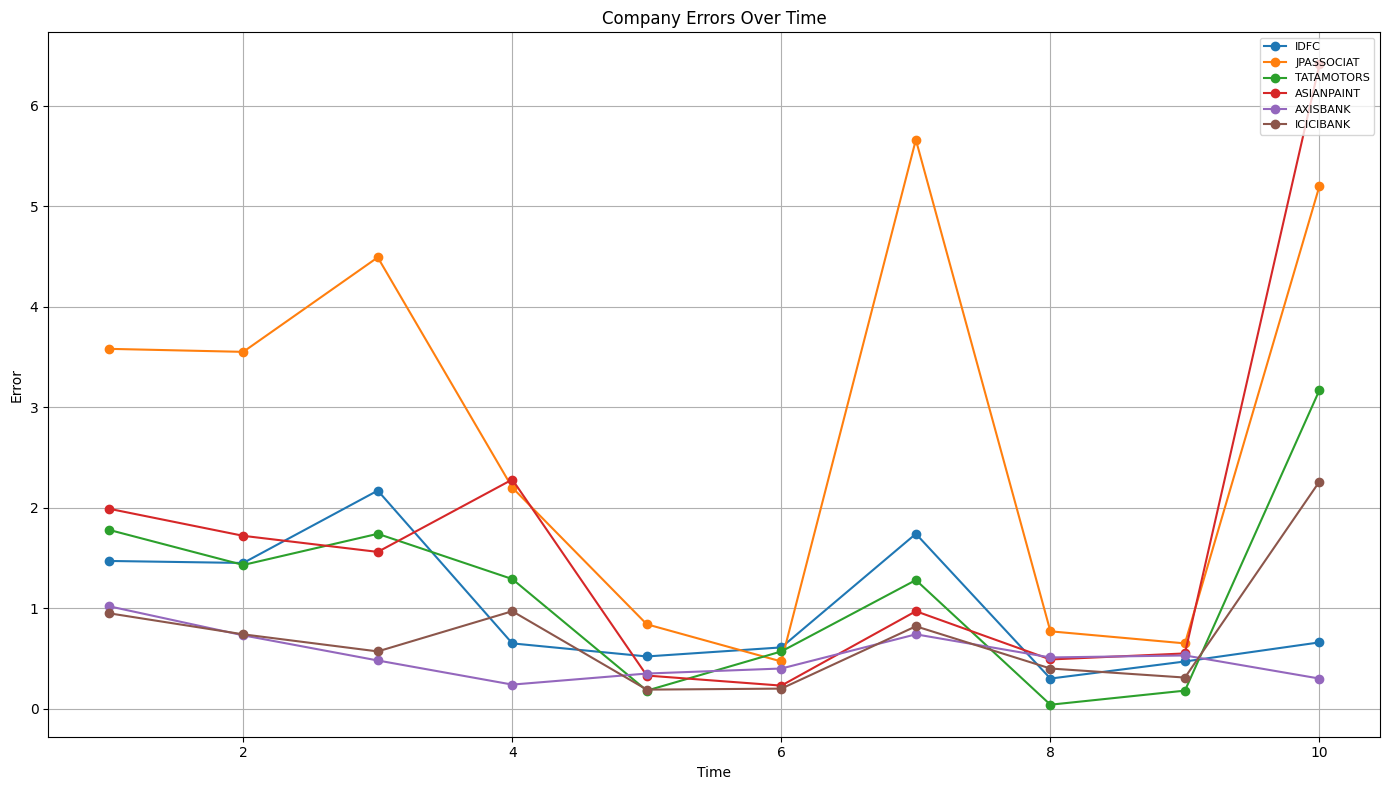

In [91]:
# Time series for x-axis
time_points = list(range(1, 11))

# Plotting
plt.figure(figsize=(14, 8))
i=0
for company, errors in company_errors.items():
    i+=1
    plt.plot(time_points, errors, marker='o', label=company)
    if i==6:
        break

plt.title("Company Errors Over Time")
plt.xlabel("Time")
plt.ylabel("Error")
plt.grid(True)
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()